<a href="https://colab.research.google.com/github/proteus21/DATA-SCIENCE-STUDY/blob/main/Machine%20Learning/07_dimensional%20reduce/07_tse_pca_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### UCZENIE NIENADZOROWANE /  UNSUPERVISED LEARNING

#  Dimensionality reduce -t-SNE method

A basic library for machine learning in Python
To install the scikit-learn library, use the command below:
```
!pip install scikit-learn
```
To update to the latest version of the scikit-learn library, use the command below:
```
!pip install --upgrade scikit-learn
```

### Contents:
1. [Import libraries](#0)
2. [Data generation ](#1)
3. [Data visualisation](#2)
4. [Standarization](#3)
5. [PCA](#4)
6. [t-SNE](#5)
7. [PCA vs t-SNE](#6)
8. [50 components](#7)



### <a name='0'></a> Import libraries

In [71]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from keras.datasets import mnist



### <a name='1'></a> Data generation

In [72]:
(X_train, y_train), (X_test, y_test)=mnist.load_data()
print(f'X_train shape:{X_train.shape}')
print(f'y_train shape:{y_train.shape}')
print(f'X_test shape:{X_test.shape}')
print(f'y_test shape:{y_test.shape}')

X_train shape:(60000, 28, 28)
y_train shape:(60000,)
X_test shape:(10000, 28, 28)
y_test shape:(10000,)


Visualisation a sample picture

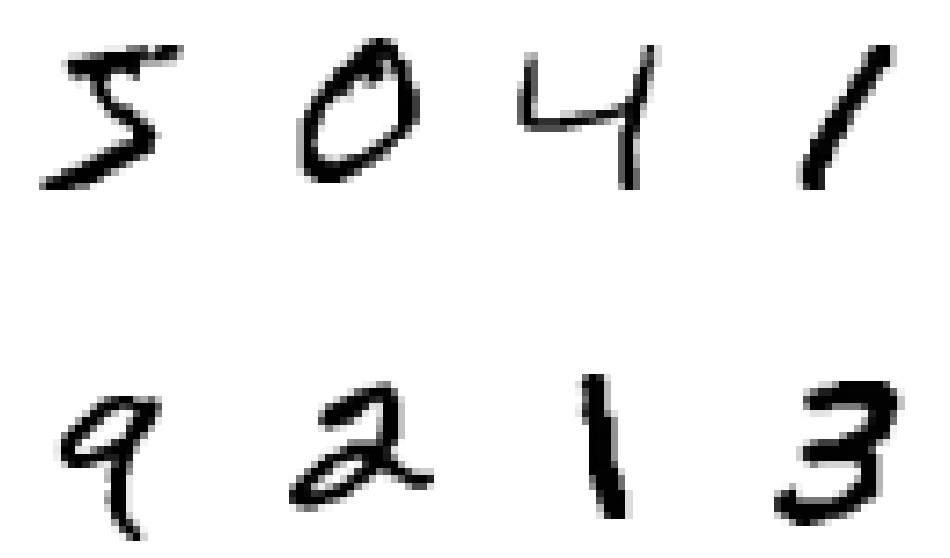

In [73]:

plt.figure(figsize=(12, 8))
for i in range(8):
    plt.subplot(240 + i + 1)
    plt.imshow(X_train[i], cmap='gray_r')
 #  plt.title(y_train[i], color='black', fontsize=17)- Appears 'str' error
    plt.axis('off')
plt.show()
     

In [74]:
#Cut  first 10000 pictures
X_train=X_train[:10000]
y_train=y_train[:10000]
#Flatten a pictures

X_train=X_train.reshape(-1,28*28)
X_train.shape

(10000, 784)

### <a name='3'></a> Strandarization

In [75]:
#Standarisation
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_std=scaler.fit_transform(X_train)

### <a name='4'></a>PCA

In [76]:
#PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
X_train_pca=pca.fit_transform(X_train_std)
X_train_pca.shape

(10000, 3)

In [77]:
#Explained variance
results=pd.DataFrame(data={"explained_variance_ratio":pca.explained_variance_ratio_})
results['cumulative']=results['explained_variance_ratio'].cumsum()
results['component']=results.index+1
results.head()

explained_variance_ratio  cumulative  component
0                  0.061640    0.061640          1
1                  0.043662    0.105302          2
2                  0.040458    0.145760          3

In [78]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - 3 components', width=950, template='plotly_dark'))
fig.show()
     

In [79]:
X_train_pca_df=pd.DataFrame(data=np.c_[X_train_pca, y_train], columns=['pca_1', 'pca_2', 'pca_3', 'class'])
X_train_pca_df['class'] = X_train_pca_df['class'].astype(str)
X_train_pca_df.head()

pca_1      pca_2     pca_3 class
0 -0.997624  -4.651637 -0.739862   5.0
1  8.682739  -7.124488 -4.195536   0.0
2  2.439088  10.567248 -4.057263   4.0
3 -7.291487  -3.686192  3.064843   1.0
4 -4.791491   4.498071 -5.603806   9.0

In [80]:
px.scatter(X_train_pca_df, x='pca_1', y='pca_2', color='class', opacity=0.5, width=950, 
           title='PCA - 2 components', template='plotly_dark')

In [81]:
px.scatter_3d(X_train_pca_df, x='pca_1', y='pca_2', z='pca_3', color='class', opacity=0.5, width=950, title='PCA-3 components', template='plotly_dark')

### <a name='5'></a>t-SNE

In [82]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2, verbose=1)
X_train_tsne = tsne.fit_transform(X_train_std)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.007s...
[t-SNE] Computed neighbors for 10000 samples in 6.020s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.770266
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.063385
[t-SNE] KL divergence after 1000 iterations: 1.701666


In [83]:
X_train_tsne_df = pd.DataFrame(data=np.c_[X_train_tsne, y_train], columns=['tsne_1', 'tsne_2', 'class'])
X_train_tsne_df['class'] = X_train_tsne_df['class'].astype(str)
X_train_tsne_df.head()


tsne_1     tsne_2 class
0  -0.043432 -37.049519   5.0
1  72.149223  -6.267251   0.0
2   2.638816  77.584938   4.0
3 -62.493660  -7.290048   1.0
4 -22.200369  71.154198   9.0

In [84]:
#t_SNE visualization
px.scatter(X_train_tsne_df, x='tsne_1', y='tsne_2', color='class', opacity=0.5, width=950, height=700,
           template='plotly_dark', title='TSNE - 2 components')


### <a name='6'></a>PCA vs.t_SNE comperision

In [85]:
from plotly.subplots import make_subplots
fig= make_subplots(rows=1, cols=2, subplot_titles=["PCA",'t-SNE'], horizontal_spacing=0.03)

fig1=px.scatter(X_train_pca_df, x='pca_1', y='pca_2',color='class', opacity=0.5 )
fig2=px.scatter(X_train_tsne_df, x='tsne_1', y='tsne_2', color='class', opacity=0.5)
for i in range(0,10):
  fig.add_trace(fig1['data'][i], row=1, col=1)
  fig.add_trace(fig2['data'][i], row=1, col=2)
fig.update_layout(width=950, showlegend=False, template='plotly_dark')
fig.show()

### <a name='7'></a>50 components

In [86]:
pca=PCA(n_components=50)
X_train_pca=pca.fit_transform(X_train_std)
X_train_pca.shape

(10000, 50)

In [87]:
tsne = TSNE(n_components=2, verbose=1)
X_train_tsne_50 = tsne.fit_transform(X_train_pca)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.002s...
[t-SNE] Computed neighbors for 10000 samples in 0.881s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 3.893363
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.123413
[t-SNE] KL divergence after 1000 iterations: 1.642401


In [88]:
X_train_tsne_50_df = pd.DataFrame(data=np.c_[X_train_tsne_50, y_train], columns=['tsne_1', 'tsne_2', 'class'])
X_train_tsne_50_df['class'] = X_train_tsne_50_df['class'].astype(str)
X_train_tsne_50_df

tsne_1     tsne_2 class
0     10.748004 -43.555065   5.0
1     78.698524   1.081341   0.0
2     26.390306  49.633656   4.0
3    -82.240555   4.287167   1.0
4    -10.522415  57.762787   9.0
...         ...        ...   ...
9995  -3.477288 -63.015995   5.0
9996 -11.322018  -6.012345   8.0
9997  29.320555 -65.103317   6.0
9998 -12.241016  53.455879   9.0
9999 -53.892769  36.522415   7.0

[10000 rows x 3 columns]

In [89]:
px.scatter(X_train_tsne_50_df, x='tsne_1', y='tsne_2', color='class', opacity=0.5, width=950, height=700, template='plotly_dark', title='t-SNE- 2 components after PCA')

In [90]:
fig=make_subplots(rows=1, cols=3, subplot_titles=['PCA', 't-s-SNE', 't-SNE after PCA'], horizontal_spacing=0.03)

fig1=px.scatter(X_train_pca_df, x='pca_1', y='pca_2', color='class', opacity=0.5)
fig2=px.scatter(X_train_tsne_df, x='tsne_1', y='tsne_2', color='class', opacity=0.5)
fig3=px.scatter(X_train_tsne_50_df, x='tsne_1', y='tsne_2', color='class', opacity=0.5)

for i in range(0,10):
  fig.add_trace(fig1['data'][i],row=1, col=1)
  fig.add_trace(fig2['data'][i],row=1, col=2)
  fig.add_trace(fig3['data'][i],row=1, col=3)
fig.update_layout(width=1000, height=500, showlegend=False, template='plotly_dark')
fig.show()


3 components

In [95]:
tsne=TSNE(n_components=3, verbose=1)
X_train_tsne=tsne.fit_transform(X_train_pca)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.002s...
[t-SNE] Computed neighbors for 10000 samples in 1.220s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 3.893363
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.323799
[t-SNE] KL divergence after 1000 iterations: 1.447417


In [96]:
X_train_tsne_df = pd.DataFrame(data=np.c_[X_train_tsne, y_train], columns=['tsne_1', 'tsne_2', 'tsne_3', 'class'])
X_train_tsne_df['class'] = X_train_tsne_df['class'].astype(str)
X_train_tsne_df

tsne_1     tsne_2     tsne_3 class
0     -2.031838 -16.797392  -1.850885   5.0
1     22.895433  -6.071908  -1.533821   0.0
2     12.593538  11.950138  -9.903963   4.0
3    -16.348379  -9.312979  -0.047569   1.0
4     -3.586159  15.570704  -6.011371   9.0
...         ...        ...        ...   ...
9995   6.847936 -10.842517  -9.192451   5.0
9996   1.078619   0.909749  -5.044200   8.0
9997   7.131705 -10.634869  20.550379   6.0
9998  -3.643453  12.557591  -6.538032   9.0
9999 -18.519726   6.196038  -7.376426   7.0

[10000 rows x 4 columns]

In [97]:
px.scatter_3d(X_train_tsne_df, x='tsne_1', y='tsne_2', z='tsne_3', color='class', opacity=0.5, width=950, height=700,
           template='plotly_dark', title='TSNE - 3 components')